In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df = pd.read_csv('train.csv')
df.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V78,V79,V80,V81,V82,V83,V84,V85,V86,Buy
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,6,23,1,2,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df['V4'].value_counts()

3    1888
2    1490
4     495
1     186
5      48
Name: V4, dtype: int64

In [82]:
df.shape

(4107, 87)

C:\Users\e175932\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buy', ylabel='count'>

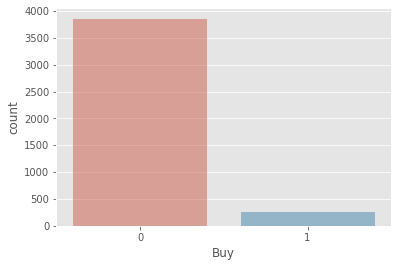

In [83]:
plt.style.use('ggplot')
sns.countplot(df['Buy'], alpha =0.5)

In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [86]:
X = df.drop(columns=('Buy'))
y = df['Buy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [87]:
#RandomSearch Tune

params = { 'max_depth': [4,5, 6,10, 12, 15],
         'learning_rate': np.arange(0.008, 0.025, 0.001),
         'subsample': np.arange(0.5, 1.0, 0.01),
         'colsample_bytree': np.arange(0.5,0.8, 0.05),
         'colsample_bylevel': np.arange(0.5,0.8, 0.05), 
         'n_estimators': [50, 100,150,200]}
xgbr = xgb.XGBRegressor()

cv = RepeatedStratifiedKFold(n_splits= 5, n_repeats=2, random_state=None)

clf = RandomizedSearchCV(estimator=xgbr,
                        param_distributions=params,
                         cv = cv,
                        scoring='roc_auc',
                        n_iter=15,
                        verbose=1)

In [88]:
clf.fit(X, y)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=None),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=Non...
                                        'max_depth': [4, 5, 6, 10, 12, 15],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': array([0.5 , 0.51, 0.52, 0.5

In [89]:
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Best parameters: {'subsample': 0.7700000000000002, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.024000000000000014, 'colsample_bytree': 0.7500000000000002, 'colsample_bylevel': 0.6000000000000001}
Lowest RMSE:  nan


<ipython-input-89-8f7cc56aacc8>:2: RuntimeWarning: invalid value encountered in double_scalars
  print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


In [90]:
from sklearn import metrics
predicts = (clf.predict(X_test) > 0.5).astype("int32")
print(metrics.confusion_matrix(y_test, predicts))
print(metrics.classification_report(y_test, predicts))

[[760   0]
 [ 59   3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       760
           1       1.00      0.05      0.09        62

    accuracy                           0.93       822
   macro avg       0.96      0.52      0.53       822
weighted avg       0.93      0.93      0.90       822



In [91]:
test = pd.read_csv('test.csv')

In [92]:
test.head()

,Id,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,5,40,1,4,2,10,1,4,1,4,...,0,0,0,0,1,0,0,0,0,0
1,14,41,1,3,3,10,0,5,0,4,...,0,0,0,0,0,0,0,0,0,0
2,16,33,1,2,3,8,0,7,0,2,...,0,0,0,0,1,0,0,0,0,0
3,26,33,1,3,3,8,0,6,1,2,...,0,0,0,0,1,0,0,0,0,0
4,28,40,1,3,3,10,0,3,0,6,...,0,0,0,0,1,0,0,0,0,0


In [93]:
pred2 = clf.predict(test)

In [94]:
pred2

array([0.07200348, 0.03097968, 0.04424676, ..., 0.1102279 , 0.23184401,
       0.19112344], dtype=float32)

In [95]:
res = pd.DataFrame(pred2)
res.index = test['Id'] # its important for comparison
res.columns = ['Predicted']
res.to_csv("submission_RandomSearch2.csv")

In [96]:
submisison1 = pd.read_csv('submission_RandomSearch2.csv')
submisison1.shape

(1715, 2)

In [97]:
submisison1.head()

,Id,Predicted
0,5,0.072003
1,14,0.030980
2,16,0.044247
3,26,0.065025
4,28,0.026642


In [98]:
submisison.shape

NameError: name 'submisison' is not defined